# Programmation côté client avec Javascript

**Javascript** est un langage de programmation né en 1995 (peu après la naissance du web) en étroite relation avec le navigateur web dominant de l'époque, Netscape. Il est rapidement devenu un **standard** pour tous les navigateurs web.

Son but est d'améliorer l'*interactivité* des pages webs, de les rendre «dynamique» sans pour autant envoyer de requête au serveur.

Ainsi, tous les navigateurs web intègre un **interpréteur Javascript** dont le rôle est d'exécuter du code Javascript *associé* à une page web particulière afin de savoir comment réagir aux actions de l'utilisateur sur cette page.

**Note**: tous les fichiers de cette partie sont dans le dossier *Exemples_prog_client_javascript*

## Exemple basique - un compteur

Dans la page html un peu après, le code source javascript est situé à deux endroits:
- à l'intérieur de la balise `<script>`,
- dans l'attribut `onclick` de l'élément `<button>`

Charger cet exemple pour voir ce qu'il fait.

```html
<!DOCTYPE html>
<html>
    <head>
        <script>
            let compteur = 0;
            function suivant() {
                compteur = compteur + 1;
                let vElt = document.querySelector('#valeur');
                vElt.textContent = compteur;
            }
        </script>
    </head>
    <body>
        <button onclick="suivant();">clic!</button>
        <span id="valeur">0</span>
    </body>
</html>
```

Vous devinez (je l'espère) que `let compteur = 0;` sert à *définir* et *initialiser* une variable et que `function suivant() { ... }` sert à *définir* une fonction.

Observer quelques différences importantes avec Python, principalement:
- la **déclaration** d'une variable est précédée par un mot clé `let`,
- chaque **instruction** est terminée par un point virgule `;`,
- le **corps d'une fonction** est délimité par des accolades `{ instruction1; instruction2; ... }`; l'indentation n'a pas de signification pour Javascript.

### Objets javascript associés aux balises

Lorsque le navigateur charge le fichier html, il produit *pour chaque balise html* un **objet javascript** qui représente cette balise. 

Il produit aussi un objet `document` qui représente la page HTML dans son ensemble.

Afin de récupérer un objet produit par le navigateur, on peut utiliser:  
```javascript
document.querySelector(<selecteur_css>);
```

Dans notre cas, pour l'objet associé à `<span id="valeur">`, cela donne:
```javascript
let vElt = document.querySelector('#valeur');
```

Cet objet dispose d'un **attribut**  `textContent` accessible en lecture et en écriture.
Sa valeur est précisément le texte contenu dans la balise, ce qui va permettre de le modifier.
```javascript
vElt.textContent = compteur;
```

### Repères sur la notion d'objet

De façon générale, en informatique, un «objet» - notons le `obj` - est une *structure de données* qui représente une entité (matérielle ou conceptuelle) au moyen:
1. d' **attributs** qu'on peut 
    - **lire** (*get*): `valeur = obj.attribut` ou,
    - **écrire** (*set*): `obj.attribut = valeur`


2. et de **méthodes** qu'on peut **exécuter**: `obj.methode(<paramètres éventuelles>)`

Par exemple, l'objet - nommons le `b` - qui représente `<button>` possède (entre autre!):
- un **attribut** `textContent` qui représente son contenu textuel
  
  ainsi `b.textContent` a pour *valeur* `'clic!'`
- une **méthode** `.clic()` qui permet de simuler un clic sur le bouton
  
  ainsi `b.clic()` a pour *effet* d'activer le bouton de la page.

### Gestion des événements

Lorsque l'utilisateur agit sur la page, le navigateur génére des **événements** (*event*).

Si l'événement produit est surveillé par un élément de la page (objet qui représente une balise ici), celui ci déclenche un **gestionnaire** (*handler*) approprié.

Un **gestionnaire** est tout simplement une fonction dont le rôle est de préciser ce qu'il faut faire lorsque l'événement surveillé survient.

En Javascript, cette association (liaison) est souvent de la forme:
```javascript
elt.addEventListener(<événement_a_surveiller>, <gestionnaire>);
```

*Note*: on réalisait quelquechose de similaire avec le module graphique tkinter en python. Pour rappel, l'association était de la forme:

```python
widget.bind(<événement_a_surveiller>, <gestionnaire>)
```

Il existe aussi une syntaxe intégrée au HTML de la forme:
```html
<balise onEvenement="code à exécuter;">
```

*Note*: cette dernière syntaxe est normalement déconseillée sauf pour des cas très simples (comme ici).

Dans notre, exemple, le clic sur le bouton déclenche l'exécution de la fonction `suivant` laquelle met à jour le texte contenu dans `<span>`.

### Approche modulaire

En informatique, le fait de mélanger dans un même fichier des éléments dont les rôles sont très différents, est une **mauvaise pratique**.

On préfère adopter une **approche modulaire**: chaque fichier (module) prend en charge un aspect des choses.

Il est donc conseillé de **séparer** ces éléments: HTML d'une part, CSS d'autre part et Javascript aussi.

Ici, cela donnerait en supposant que les fichiers sont dans le même répertoire:

Fichier *compteur.html*

```html
<!DOCTYPE html>
<html>
<head>
    <script src="compteur.js" defer="defer"></script>
</head>
<body>
    <button id="bouton">clic!</button>
    <span id="valeur">0</span>
</body>
</html>
```

Fichier *compteur.js*
```javascript
let compteur = 0;

function suivant() {
    compteur = compteur + 1;
    let vElt = document.querySelector('#valeur');
    vElt.textContent = compteur++;
}

let bouton = document.querySelector('#bouton');
bouton.addEventListener('click', suivant);
```

*Note*: le navigateur charge le fichier au fur et à mesure de sa réception ce qui a pour effet d'exécuter le code javascript **avant** que les objets associés aux balises n'aient été créés. Par exemple, l'objet bouton risque d'être cherché par le code javascript avant d'avoir été créé ce qui produirait une erreur. L'attribut `defer` indique au navigateur d'exécuter le script **après** avoir complètement chargé le document.

## Un mini jeu

L'exemple précédent était minimal. Il est utile d'en examiner un autre, un peu plus évolué, pour mieux sentir les possibilités offertes par Javascript.

### Présentation

Voici la portion de html qui va être manipulée par le script
```html
<h1>Jeu - nombre mystère</h1>
<p>
    Nous avons sélectionné un nombre mystère compris entre 1 et 1000. 
    Tu dois le retrouver le plus vite possible!
</p>
<label>Saisis le nombre auquel tu penses: </label>
<input type="text" id="saisie">
<div class="informations">
  <p class="essais"></p>
  <p class="feedback"></p>
  <p class="indice"></p>
</div>
```

En bref, le script va choisir un nombre au hasard entre 1 et 1000, lire les choix du joueur, vérifier ce choix et lui fournir un feedback pour lui permettre d'adopter une stratégie.

Voici le code javascript en quatre portions:

```javascript
let a_deviner = Math.floor(Math.random() * 1000) + 1;
let nbEssais = 1;

let saisieElt = document.querySelector('#saisie');
let essaisElt = document.querySelector('.essais');
let feedbackElt = document.querySelector('.feedback');
let indiceElt = document.querySelector('.indice');
let recommencerElt;
```
Ici, on **initialise** les variables du script. Les deux premières correspondent au nombre choisi au hasard et au nombre d'essais du joueur. Les suivantes sont les objets javascripts associées aux balises qu'on souhaite manipuler au cours du programme.

Observer que la dernière est **déclarée** sans être *initialisée*. Il n'est pas possible de faire cela en Python.

Ensuite vient la fonction principale:

```javascript
function verifierChoix(evt) {
    if (evt.key !== "Enter") return;

    let choix = Number(saisieElt.value);

    if (nbEssais === 1) {
      essaisElt.textContent = 'Essais précédent: ';
    }

    essaisElt.textContent += choix + ' ';

    if (choix === a_deviner) {
      feedbackElt.textContent = 'Félicitation! Tu as trouvé!';
      feedbackElt.style.backgroundColor = 'green';
      indiceElt.textContent = '';
      finJeu();
    } else if (nbEssais === 10) {
      feedbackElt.textContent = "!!!PERDU!!! c'était " + a_deviner;
      indiceElt.textContent = '';
      finJeu();
    } else {
      feedbackElt.textContent = 'FAUX!';
      feedbackElt.style.backgroundColor = 'red';
      if(choix < a_deviner) {
        indiceElt.textContent = 'Le dernier choix est trop petit!' ;
      } else if (choix > a_deviner) {
        indiceElt.textContent = 'Le dernier choix est trop grand!';
      }
    }

    nbEssais++;
    saisieElt.value = '';
    saisieElt.focus();
}

saisieElt.addEventListener('keyup', verifierChoix)
```

Il s'agit d'un gestionnaire d'événement comme la dernière ligne le montre: `'keyup'` correspond au relâchement d'une touche (après enfoncement). Ainsi, la fonction sera exécutée à chaque fois que l'utilisateur relâche une touche; la fonction n'agit que si cette touche est `'Enter'`.

###  `if` avec Javascript

 Les différences avec Python sont mineures:
- la condition est située entre parenthèse,
- les blocs sont délimités par des accolades (déjà vu),
- `elif` en python correspond à `else if` en Javascript.

Notez que `var++;` est (à peu près) équivalent à `var = var + 1` en python.

Enfin la méthode `.focus()` sert à rediriger le clavier vers la zone de saisie; autrement, il faudrait cliquer dans la zone de saisie pour la réactiver (curseur clignotant).

```javascript
function finJeu() {
    saisieElt.disabled = true;
    recommencerElt = document.createElement('button');
    recommencerElt.textContent = 'Recommencer une partie';
    document.body.appendChild(recommencerElt);
    recommencerElt.addEventListener('click', reinitialiserJeu);
}
```

Cette fonction sert à gérer la fin de partie. 

### Créer des balises html à la volée

La fonction `finJeu` crée un bouton dynamiquement selon les étapes:
- créer un nouvel objet javascript de type *button* avec `.createElement('balise')`,
- renseigner son contenu et
- l'intègrer au corps du document avec `.appendChild(objet)`. (sinon il ne serait pas insérer dans le document) 

La dernière étape revient en effet à ajouter la balise `<button>Rec...</button>` à l'intérieur et à la fin de `<body>`.

Ainsi l'utilisateur peut, en cliquant sur ce bouton (qui à reçu un gestionnaire...), relancer une nouvelle partie avec ...

```javascript
function reinitialiserJeu() {
    nbEssais = 1;

    let informationElts = document.querySelectorAll('.informations p');
    for(let i = 0 ; i < informationElts.length ; i++) {
      informationElts[i].textContent = '';
    }

    recommencerElt.parentNode.removeChild(recommencerElt);
    saisieElt.disabled = false;
    saisieElt.value = '';
    saisieElt.focus();
    feedbackElt.style.backgroundColor = 'white';
    a_deviner = Math.floor(Math.random() * 1000) + 1;
}
```

La mission de cette fonction est de «tout remettre en ordre»: repositionner `nbEssais`, nettoyer la zone *informations*, supprimer le bouton «recommencer», réactiver, vider et focaliser la zone de saisie et enfin tirer un nouveau nombre au hasard.

### Boucle `for` en Javascript

Notez la boucle `for` pour parcourir la liste de trois éléments `informationsElts`:
- en *Python*, on écrirait (parcours direct d'une liste de taille N)
```python
for i in range(N): ...
```


- en *Javascript* la syntaxe est de la forme:
```javascript
for(init_var; condition; changement_var) {...}
```
    - *init_var*: déclaration et initialisation de la variable de boucle - ici `let i = 0`,
    - *condition*: doit être vraie pour poursuivre la boucle - ici `i < N`,
    - *changement_var*: précise la modification de la variable de boucle à chaque nouveau tour - ici `i++` (incrémentation)

Notez encore que, comme avec Python, les indices démarrent à zéro.

### Arbre du document

Observer la stratégie pour supprimer le bouton «relancer»:
```javascript
recommencerElt.parentNode.removeChild(recommencerElt);
```

En effet, le navigateur ne se contente pas de créer un objet javascript par balise. Il les **lie** entre eux de façon à reconstituer l'**arbre du document** (qui reflète l'imbrication des balises). Dans notre cas, voilà son allure (sans détailler le head):

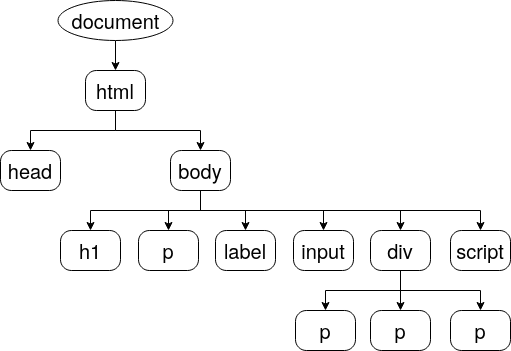

En particulier, chaque objet lié à une balise possède un attribut `parentNode` dont la valeur est son «parent direct»; par exemple le noeud (*node*) parent de *label* est *body*.

Chaque «noeud» peut supprimer l'un de ces enfant:
```javascript
noeud_parent.removeChild(noeud_enfant)
```

or `noeud_parent` est précisément `noeud_enfant.parentNode` ... voyez-vous l'astuce?

## Vidéo d'aide

In [ ]:
%%HTML
<iframe src="https://player.vimeo.com/video/403636684" width="640" height="564" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>

## Conclusion

Javascript est un langage puissant qui permet la réalisation d'interfaces web proche d'un logiciel de bureau.

C'est devenu au fil du temps un langage à part entière qui peut être utilisé en dehors de tout navigateur web et qui peut même servir à faire de la programmation côté serveur.

Si vous voulez approfondir vos connaissances dans ce langage (et croyez moi, ce ne sera pas «peine perdu»), le [site de la fondation Mozilla](https://developer.mozilla.org/fr/) est un bon point de départ.